## PROJET 6: CLASSIFICATION AUTOMATIQUE DE BIENS DE CONSOMMATION

### SOMMAIRE

PARTIE I: EXTRACTION FEATURES DES DONNEES TEXTES

PARTIE II: EXTRACTION FEATURES DES DONNEES IMAGES

PARTIE III: DATA AUGMENTATION, CLASSICIFICATION SUPERVISEE

PARTIE IV: CONCEPT D'UNE TECHNIQUE RECENTE ET SCRIPT PYTHON

In [1]:
# les librairies 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### a) <b>lecture fichier

In [2]:
# fonction lecture fichier csv
def read_csv(path_file):
    return pd.read_csv(path_file)

In [3]:
# lecture du df et affichage des cinq premières lignes
df=read_csv(r"/Users/saidali_bacar/Documents/projets openclassrooms/projet 6/df_projet6_pour_partie3.csv")
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category,product_category2,cat_num,sentence_bow_lem,sentence_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,3,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,4,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel b...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,4,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,3,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,3,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...


PARTIE III: TRANSFERT LEARNING CNN
- VGG16
- ResNet

architecture vgg16

https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/

difference between alexnet, vggnet, resnet and inception

https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

vanishing gradient problem

https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

In [4]:
# les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


A/ ETUDE DE FAISABILITE

a) etude du modele pre-entraine

la cible

In [5]:
l_cat = list(set(df["product_category"]))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]["product_category"])) for i in range(len(df))]
#y_cat_num

df["cat_num"] = [(l_cat.index(df.iloc[i]["product_category"])) for i in range(len(df))]
#df["cat_num"]

catégories :  ['Baby Care ', 'Home Decor & Festive Needs ', 'Watches ', 'Computers ', 'Kitchen & Dining ', 'Home Furnishing ', 'Beauty and Personal Care ']


les fonctions communes 

PCA, TSNE, Kmeans

In [6]:
import time
from sklearn.cluster import KMeans
from sklearn import manifold, decomposition
from sklearn import cluster, metrics

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)

    print("Dimensions dataset avant réduction PCA : ", images_features.shape)
    pca = decomposition.PCA(n_components=0.99)
    feat_pca= pca.fit_transform(images_features)
    print("Dimensions dataset après réduction PCA : ", feat_pca.shape)
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),7)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

visualisation

In [7]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    style="cluster",  # Additional marker customization based on cluster
    markers=['o', 's', 'D', '^', 'v', '<', '>'],  # Customize markers
    
    plt.show()
    print("ARI : ", ARI)

le modele

## VGG16

In [8]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

b) Création des features des images

In [9]:
path = r"/Users/saidali_bacar/Documents/projets openclassrooms/projet 6/Images"
df["image_path"] = df["uniq_id"].apply(lambda x: os.path.join(path, f"{x}.jpg"))

In [10]:
images_features = []
i=0 
for image_file in df["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

In [11]:
images_features.shape

(1050, 4096)

In [12]:
X_img_vgg16 = images_features

In [13]:
# sauvegarde de la matrice pour l'approche combinee 
#np.save('X_img_vgg16.csv', X_img_vgg16)

score ARI

In [14]:
print("VGG16 : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(images_features)

VGG16 : 
--------
Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)
ARI :  0.5015494 time :  4.0


visualisation graphique 

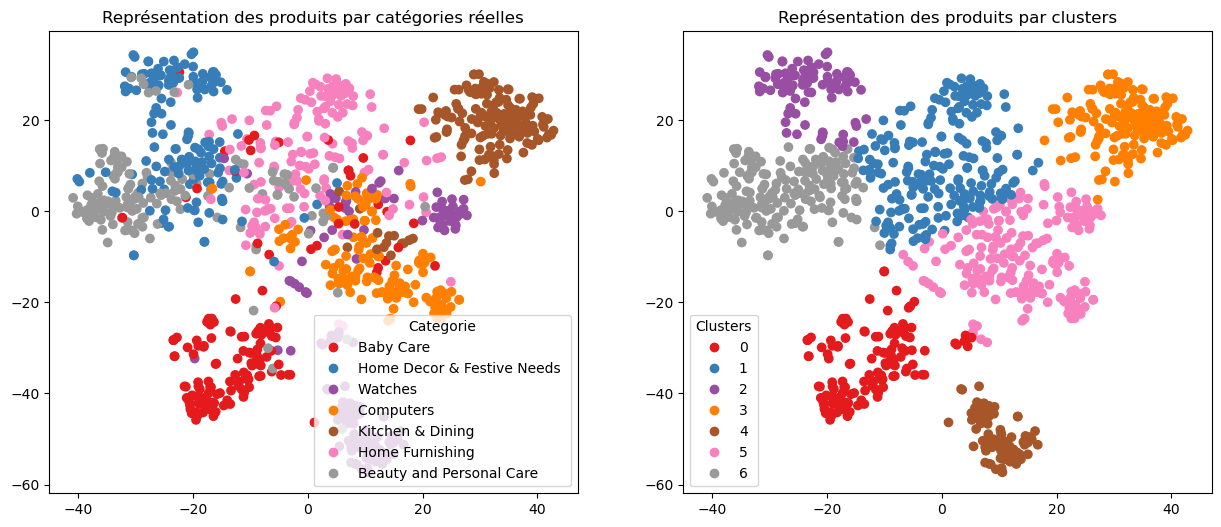

ARI :  0.5015494


In [15]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## ResNet

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained ResNet50 model
model_ResNet = ResNet50(weights='imagenet')
print(model_ResNet.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

features extraction

In [17]:
images_features_ResNet = []
i=0 
for image_file in df["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features_ResNet.append(model_ResNet.predict(image, verbose=0)[0]) # predict from pretrained model

images_features_ResNet = np.asarray(images_features_ResNet)
images_features_ResNet.shape

0
100
200
300
400
500
600


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 1000)

score ARI

In [18]:
print("ResNet : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(images_features_ResNet)

ResNet : 
--------
Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)
ARI :  0.3655616 time :  4.0


visualisation graphique

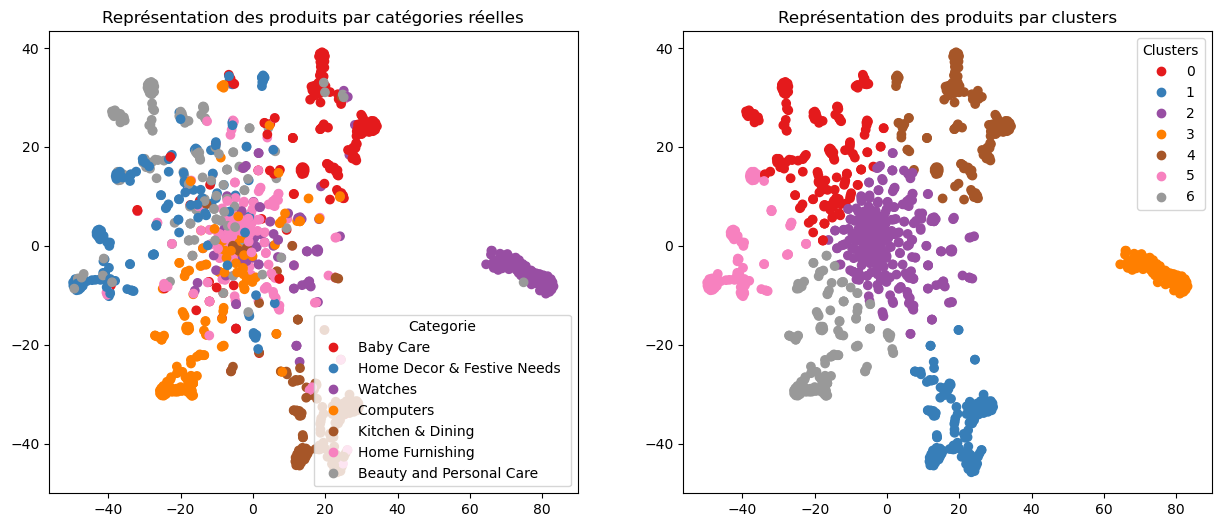

ARI :  0.3655616


In [19]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [20]:
#X_tsne
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne

,tsne1,tsne2
0,-6.453172,33.502510
1,-36.989853,14.457862
2,-34.818520,14.205570
3,-39.834576,-10.181951
4,-48.093582,-7.228191
...,...,...
1045,-38.960876,-7.361879
1046,25.113958,30.029047
1047,-5.441136,18.922314
1048,-7.928598,6.876175


In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Corrected the instantiation of KMeans
cls = KMeans(n_clusters=7)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 3)


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Analyse par classes

In [22]:
print(labels)
print(cls.labels_)

[0 5 5 ... 0 2 0]
[5 2 2 ... 5 6 5]


In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = metrics.confusion_matrix(df["cat_num"], cls.labels_)
print(conf_mat)

[[  0   6  16   3   1  98  26]
 [  6   4   7  10   0  11 112]
 [126   2   0   5   0   1  16]
 [  2   4   0  88   0   6  50]
 [  4   5   0   6  74   0  61]
 [  0   9  66   7   0  56  12]
 [  1 113   4  12   0   9  11]]


In [24]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [25]:
cls_labels_transform = conf_mat_transform(df["cat_num"], cls.labels_)
conf_mat = metrics.confusion_matrix(df["cat_num"], cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(df["cat_num"], cls_labels_transform))

Correspondance des clusters :  [2 6 5 3 4 0 1]
[[ 98  26   0   3   1  16   6]
 [ 11 112   6  10   0   7   4]
 [  1  16 126   5   0   0   2]
 [  6  50   2  88   0   0   4]
 [  0  61   4   6  74   0   5]
 [ 56  12   0   7   0  66   9]
 [  9  11   1  12   0   4 113]]

              precision    recall  f1-score   support

           0       0.54      0.65      0.59       150
           1       0.39      0.75      0.51       150
           2       0.91      0.84      0.87       150
           3       0.67      0.59      0.63       150
           4       0.99      0.49      0.66       150
           5       0.71      0.44      0.54       150
           6       0.79      0.75      0.77       150

    accuracy                           0.64      1050
   macro avg       0.71      0.64      0.65      1050
weighted avg       0.71      0.64      0.65      1050



In [26]:
set(df["product_category"])

{'Baby Care ',
 'Beauty and Personal Care ',
 'Computers ',
 'Home Decor & Festive Needs ',
 'Home Furnishing ',
 'Kitchen & Dining ',
 'Watches '}

<Axes: >

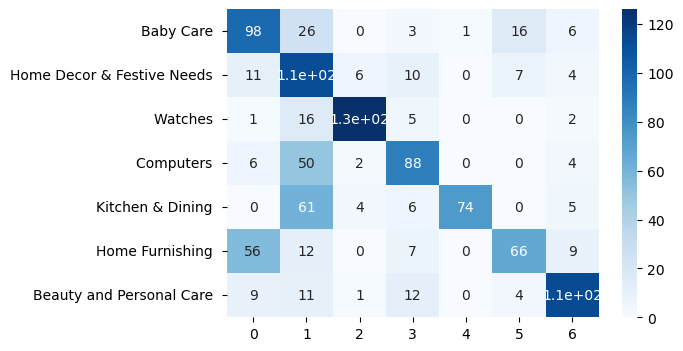

In [27]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in set(df["product_category"])],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

exemple de traitement d'une seule image

In [28]:
from matplotlib.image import imread

tsne1     -2.092291
tsne2      4.301388
cluster    6.000000
Name: 200, dtype: float64


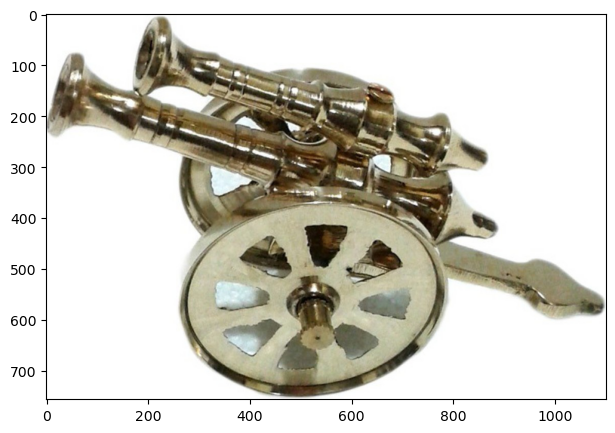

In [29]:
# Affichage image "shine" considérée comme "cloudy"
id = 200
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))

filename = df["image_path"][id]
image = imread(filename)
plt.imshow(image)
plt.show()

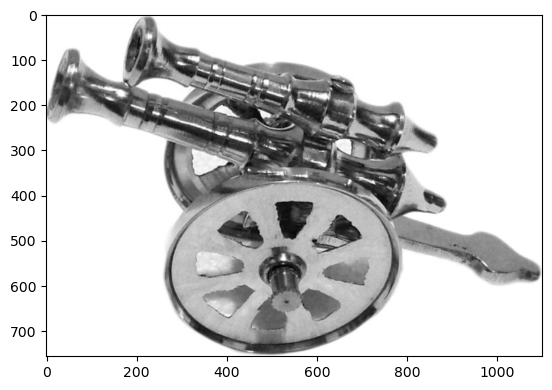

In [30]:
# convertir une image en gris en utilisant la formule standard de multiplication des matrices RGB(red,green,blue)

import matplotlib.image as mpimg

img = mpimg.imread(df["image_path"][id])

R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap="gray")
plt.show()

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle

### Création du modèle de classification

In [31]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

### Approche préparation initiale des images

In [32]:
def image_prep_fct(df):
    prepared_images = []
    for image_num in range(len(df['image_path'])) :
        img = (load_img(
            df['image_path'][image_num],
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(df)
print(images_np.shape)
#images_np_test = image_prep_fct(data_test)
#print(images_np_test.shape)

/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1050, 224, 224, 3)


determination de X et y

In [33]:
X = images_np
y = to_categorical(df['cat_num'], num_classes=7)

#X_test = images_np_test
#y_test = to_categorical(data_test['label'])

y

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(787, 224, 224, 3)

creation et entrainement du modele

In [35]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_model_fct()
    
# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 1.7130 - accuracy: 0.6963
Epoch 2: val_loss improved from 1.32183 to 1.07210, saving model to ./model1_best_weights.h5
25/25 [==============================] - 55s 2s/step - loss: 1.7130 - accuracy: 0.6963 - val_loss: 1.0721 - val_accuracy: 0.7757
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.2427 - accuracy: 0.7408
Epoch 3: val_loss improved from 1.07210 to 1.04909, saving model to ./model1_best_weights.h5
25/25 [==============================] - 54s 2s/step - loss: 1.2427 - accuracy: 0.7408 - val_loss: 1.0491 - val_accuracy: 0.8061
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.8183
Epoch 4: val_loss improved from 1.04909 to 0.97144, saving model to ./model1_best_weights.h5
25/25 [==============================] - 54s 2s/step - loss: 0.7194 - accuracy: 0.8183 - val_loss: 0.9714 - val_accuracy: 0.7909
Epoch 5/50
25/25 [==============================] - ETA: 0s - l

loss et accuracy dans les jeux d'entrainement (75%) et de validation (25%)

In [36]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

25/25 [==============================] - 41s 2s/step - loss: 0.0140 - accuracy: 0.9987
Training Accuracy: 0.9987

9/9 [==============================] - 14s 1s/step - loss: 0.8907 - accuracy: 0.8403
Validation Accuracy:  0.8403


score de l'epoch optimal

In [37]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

#loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
#print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8099


visualisation des resultats avec un graphique 

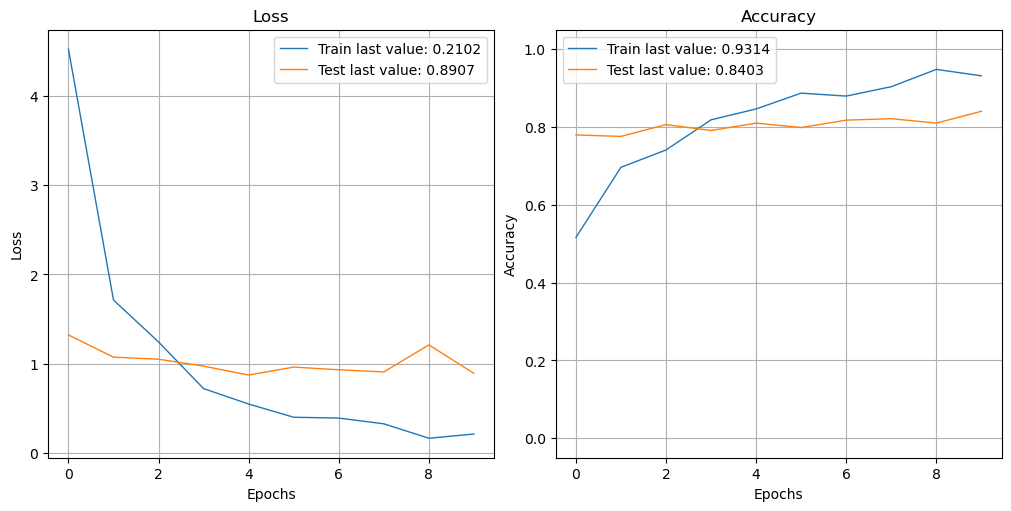

In [38]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

matrice de confusion 

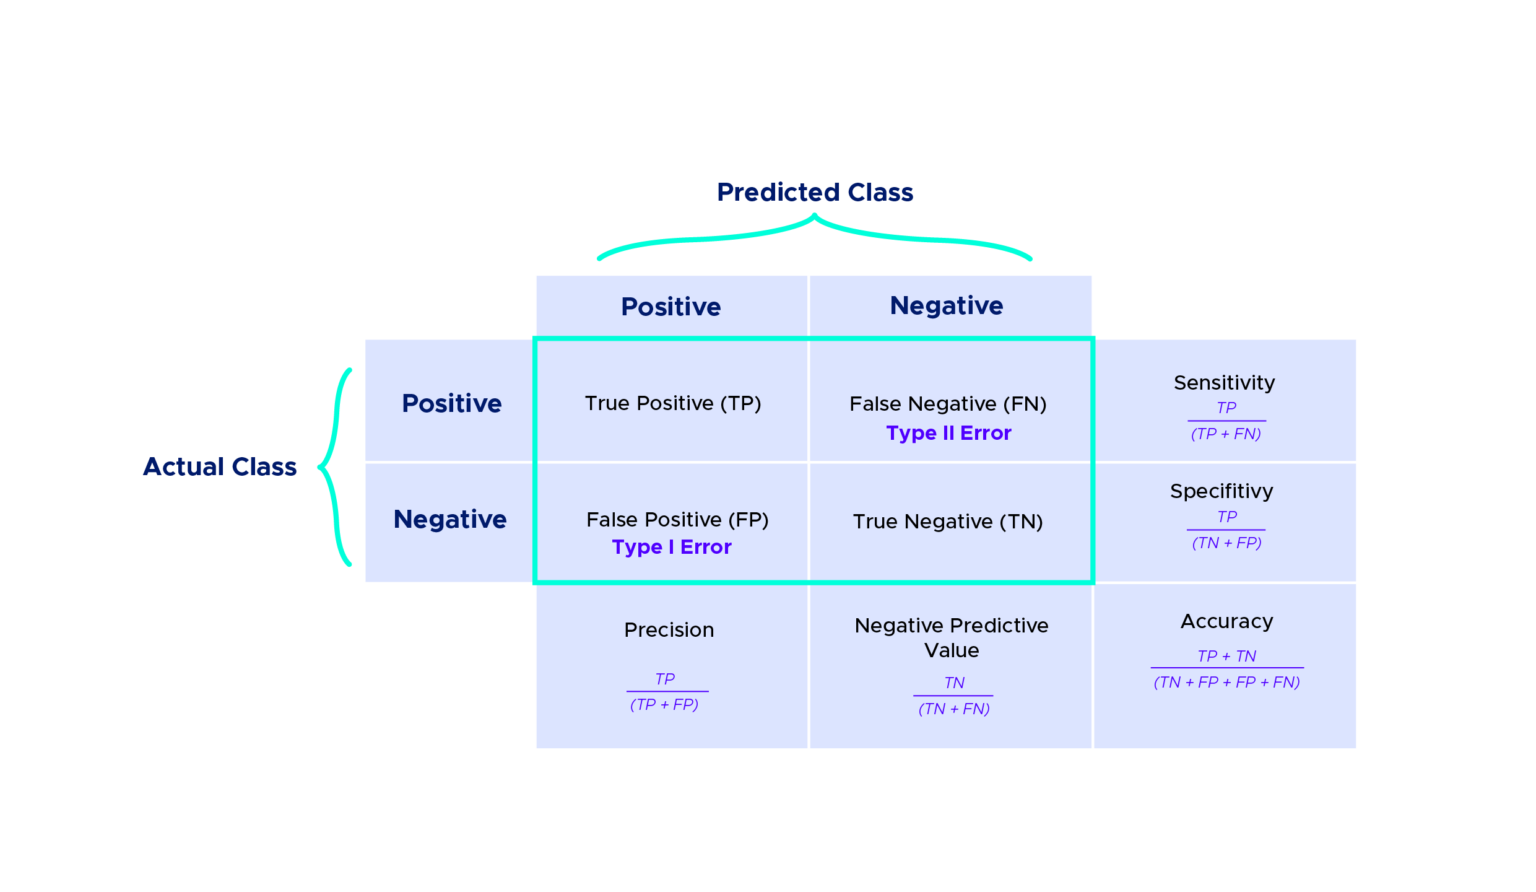

matrice de confusion, explication

https://datascientest.com/matrice-de-confusion

In [39]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

9/9 [==============================] - 14s 1s/step
[3 3 1 4 3 1 5 0 3 0 0 4 6 5 0 6 5 0 2 6 2 2 1 0 4 5 4 6 2 2 0 2 1 3 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 3 4 0 0
 4 2 4 4 6 3 1 4 5 5 1 2 1 0 3 5 5 2 3 1 6 3 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 3 2 3 4 2 0 3 3 0 5 1 3 3 1 5 0 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 5 3 5 1 2 4 3 1 2 5 5 2 2 0 0 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 5 0 2 2 1 6 2 0 6 4 3 3 5 3 4 1 4 0 5 5 5 2 5 6 3 6 4 6 2
 5 4 1 4 6 6 4 1 3 6 5 6 3 6 3 2 3 2 5 6 0 2 4 5 0 4 3 0 2 4 4 2 2 5 2 6 1
 6 6 2 1]

[3 3 1 4 3 1 0 0 3 0 0 4 6 5 4 6 5 1 2 6 2 2 3 0 4 5 4 6 2 2 0 2 1 1 2 0 4
 0 0 1 6 6 1 5 4 4 0 6 2 6 1 2 3 6 1 4 6 1 4 0 1 6 1 1 1 6 0 3 6 0 1 4 0 0
 4 2 4 6 6 3 4 4 5 5 1 2 1 0 5 0 5 2 3 1 3 3 6 6 5 4 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 0 6 4 4 2 1 4 0 3 3 2 3 4 1 6 6 3 4 5 5 6 3 1 5 1 1 0 3 6 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 3 0 1 3 0 1 2 4 3 1 2 5 5 2 2 0 0 3 0 0 4 4 1 4
 4 1 3 2 3 6 5 2 5 0 2 2 0 1 2 0 3 4 3

In [40]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[30  4  0  0  2  1  1]
 [ 1 29  0  1  3  3  0]
 [ 0  1 36  1  0  0  0]
 [ 0  2  0 31  0  1  4]
 [ 1  3  0  0 33  0  1]
 [ 8  2  0  0  1 24  2]
 [ 1  1  2  2  1  0 30]]


In [41]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[30  4  0  0  2  1  1]
 [ 1 29  0  1  3  3  0]
 [ 0  1 36  1  0  0  0]
 [ 0  2  0 31  0  1  4]
 [ 1  3  0  0 33  0  1]
 [ 8  2  0  0  1 24  2]
 [ 1  1  2  2  1  0 30]]

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           1       0.69      0.78      0.73        37
           2       0.95      0.95      0.95        38
           3       0.89      0.82      0.85        38
           4       0.82      0.87      0.85        38
           5       0.83      0.65      0.73        37
           6       0.79      0.81      0.80        37

    accuracy                           0.81       263
   macro avg       0.81      0.81      0.81       263
weighted avg       0.81      0.81      0.81       263



<Axes: >

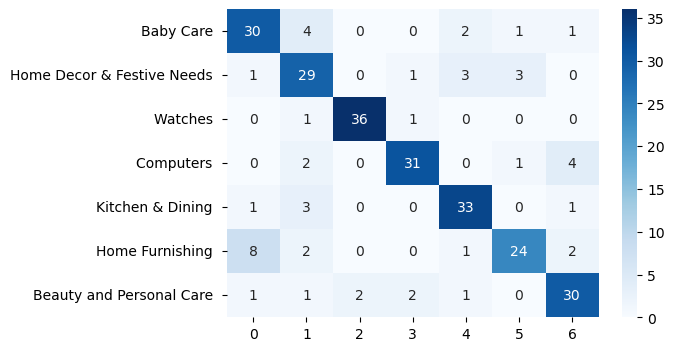

In [42]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in set(df["product_category"])],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

### ResNet, approche sans la data augmentation

creation du modele de classification

In [43]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    
    #model_ResNet = ResNet50(weights='imagenet')
    
    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [44]:
input_shape = (224, 224, 3)

# Create the model
model1_a = create_model_fct()

# Model callbacks
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Train the model
history1_a = model1_a.fit(X_train, y_train, epochs=50, batch_size=32, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.8183
Epoch 2: val_loss improved from 0.74678 to 0.54763, saving model to ./model1_best_weights.h5
25/25 [==============================] - 17s 701ms/step - loss: 0.5837 - accuracy: 0.8183 - val_loss: 0.5476 - val_accuracy: 0.8517
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.8463
Epoch 3: val_loss did not improve from 0.54763
25/25 [==============================] - 17s 696ms/step - loss: 0.4763 - accuracy: 0.8463 - val_loss: 0.6636 - val_accuracy: 0.8099
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.3833 - accuracy: 0.8818
Epoch 4: val_loss did not improve from 0.54763
25/25 [==============================] - 17s 695ms/step - loss: 0.3833 - accuracy: 0.8818 - val_loss: 0.5610 - val_accuracy: 0.8479
Epoch 5/50
25/25 [==============================] - ETA: 0s - loss: 0.2782 - accuracy: 0.9060
Epoch 5: val_loss did not improve from 0.54763
25/25

loss et accuracy dans les jeux d'entrainement (75%) et de validation (25%)

In [45]:
# Score du dernier epoch

loss, accuracy = model1_a.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1_a.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

25/25 [==============================] - 13s 512ms/step - loss: 0.0440 - accuracy: 0.9873
Training Accuracy: 0.9873

9/9 [==============================] - 4s 478ms/step - loss: 0.6111 - accuracy: 0.8441
Validation Accuracy:  0.8441


score de l'epoch optimal

In [46]:
# Score de l'epoch optimal

model1_a.load_weights(model1_save_path1)

loss, accuracy = model1_a.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

#loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
#print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8517


visualisation des resultats avec un graphique 

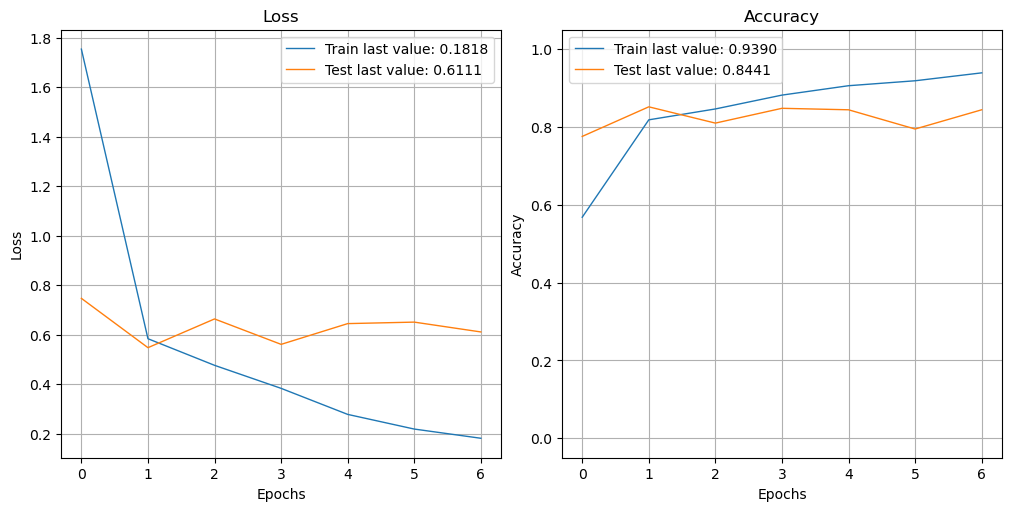

In [47]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1_a)
plot_history(history1_a, path="standard.png")
plt.close()

matrice de confusion 

In [48]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1_a.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

9/9 [==============================] - 5s 469ms/step
[3 3 1 4 3 1 5 0 3 0 0 4 6 5 0 6 5 0 2 6 2 2 1 0 4 5 4 6 2 2 0 2 1 3 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 3 4 0 0
 4 2 4 4 6 3 1 4 5 5 1 2 1 0 3 5 5 2 3 1 6 3 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 3 2 3 4 2 0 3 3 0 5 1 3 3 1 5 0 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 5 3 5 1 2 4 3 1 2 5 5 2 2 0 0 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 5 0 2 2 1 6 2 0 6 4 3 3 5 3 4 1 4 0 5 5 5 2 5 6 3 6 4 6 2
 5 4 1 4 6 6 4 1 3 6 5 6 3 6 3 2 3 2 5 6 0 2 4 5 0 4 3 0 2 4 4 2 2 5 2 6 1
 6 6 2 1]

[3 3 1 4 3 1 5 0 3 0 0 4 6 5 4 3 5 0 2 6 2 2 3 0 4 5 4 6 2 2 0 2 1 5 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 5 4 6 1 4 0 1 6 1 3 5 6 5 3 6 0 2 4 0 0
 4 2 4 4 6 3 5 4 5 5 5 2 1 0 3 0 5 2 3 1 3 3 0 5 5 1 5 4 2 4 0 0 0 0 4 6 5
 0 4 5 0 6 1 4 2 3 4 0 3 3 2 3 4 2 6 6 3 4 5 5 3 3 1 5 1 1 0 1 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 1 3 5 3 2 4 3 1 2 5 5 2 2 5 0 3 0 0 4 4 1 4
 4 3 3 3 3 6 5 2 5 0 2 2 5 1 2 5 3 4

In [49]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[30  2  0  0  2  3  1]
 [ 0 27  0  5  0  5  0]
 [ 0  0 38  0  0  0  0]
 [ 0  1  1 34  0  1  1]
 [ 0  1  0  1 36  0  0]
 [ 4  2  0  0  0 31  0]
 [ 3  1  1  4  0  0 28]]


In [50]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[30  2  0  0  2  3  1]
 [ 0 27  0  5  0  5  0]
 [ 0  0 38  0  0  0  0]
 [ 0  1  1 34  0  1  1]
 [ 0  1  0  1 36  0  0]
 [ 4  2  0  0  0 31  0]
 [ 3  1  1  4  0  0 28]]

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.79      0.73      0.76        37
           2       0.95      1.00      0.97        38
           3       0.77      0.89      0.83        38
           4       0.95      0.95      0.95        38
           5       0.78      0.84      0.81        37
           6       0.93      0.76      0.84        37

    accuracy                           0.85       263
   macro avg       0.85      0.85      0.85       263
weighted avg       0.86      0.85      0.85       263



<Axes: >

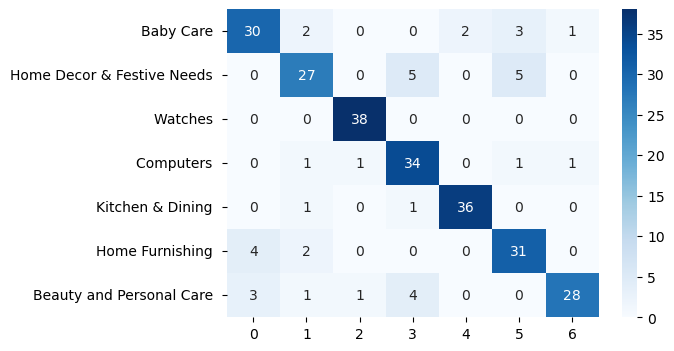

In [51]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in set(df["product_category"])],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

melanger les images classées intilialement par classe 

In [53]:
# Pour mélanger les images, classées initalement par classe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [54]:
#df

preparation 

In [55]:
batch_size=32
input_shape = (224, 224, 3)

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='image_path', y_col='product_category',
                                weight_col=None, target_size=(224, 224),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

les paramètres de la data augmentation 

In [56]:
datagen_train = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.25,
        preprocessing_function=preprocess_input)

train_flow = data_flow_fct(df, datagen_train, data_type='training')
val_flow = data_flow_fct(df, datagen_train, data_type='validation')

#datagen_test = ImageDataGenerator(
#    validation_split=0,
#    preprocessing_function=preprocess_input)

#test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 788 validated image filenames belonging to 7 classes.
Found 262 validated image filenames belonging to 7 classes.


le modele et l'entrainement du modele

In [57]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [58]:
# Création du modèle
with tf.device('/gpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [59]:
with tf.device('/gpu:0'): 
    history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 4.3068 - accuracy: 0.4543

/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_loss improved from inf to 1.39495, saving model to ./model2_best_weights.h5
25/25 [==============================] - 58s 2s/step - loss: 4.3068 - accuracy: 0.4543 - val_loss: 1.3950 - val_accuracy: 0.6947
Epoch 2/50


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 1.6782 - accuracy: 0.6739
Epoch 2: val_loss improved from 1.39495 to 1.07476, saving model to ./model2_best_weights.h5
25/25 [==============================] - 58s 2s/step - loss: 1.6782 - accuracy: 0.6739 - val_loss: 1.0748 - val_accuracy: 0.7481
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 1.1256 - accuracy: 0.7322
Epoch 3: val_loss improved from 1.07476 to 0.83552, saving model to ./model2_best_weights.h5
25/25 [==============================] - 58s 2s/step - loss: 1.1256 - accuracy: 0.7322 - val_loss: 0.8355 - val_accuracy: 0.7519
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.7698 - accuracy: 0.7792
Epoch 4: val_loss improved from 0.83552 to 0.71501, saving model to ./model2_best_weights.h5
25/25 [==============================] - 58s 2s/step - loss: 0.7698 - accuracy: 0.7792 - val_loss: 0.7150 - val_accuracy: 0.8168
Epoch 5/50
25/25 [==============================] - ETA: 0s - l

visualisation graphique VGG16

In [60]:
# Score du dernier epoch VGG16

loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

25/25 [==============================] - 43s 2s/step - loss: 0.0269 - accuracy: 0.9962
Training Accuracy   : 0.9962

9/9 [==============================] - 15s 2s/step - loss: 0.7479 - accuracy: 0.8282
Validation Accuracy :  0.8282


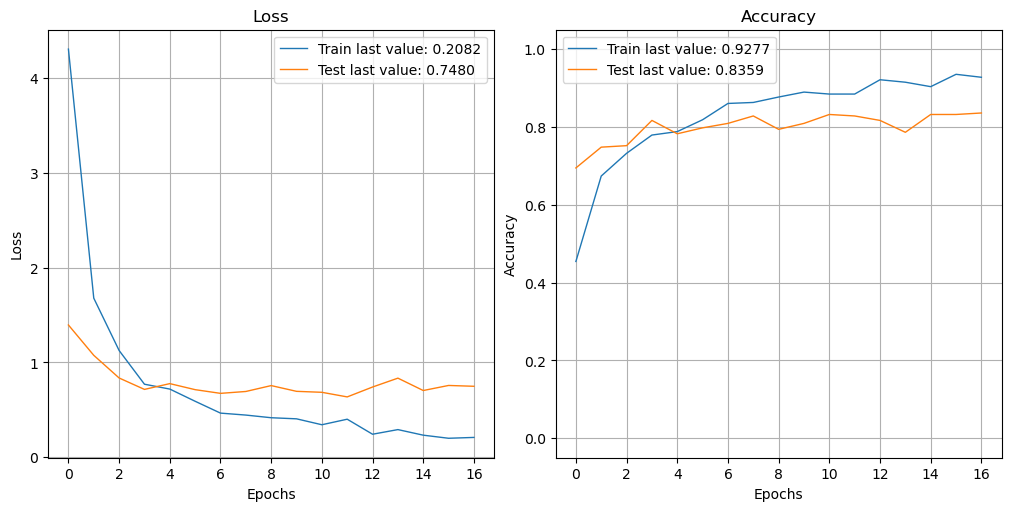

In [61]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

matrice de confusion

In [62]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model2.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

9/9 [==============================] - 14s 1s/step
[3 3 1 4 3 1 5 0 3 0 0 4 6 5 0 6 5 0 2 6 2 2 1 0 4 5 4 6 2 2 0 2 1 3 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 3 4 0 0
 4 2 4 4 6 3 1 4 5 5 1 2 1 0 3 5 5 2 3 1 6 3 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 3 2 3 4 2 0 3 3 0 5 1 3 3 1 5 0 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 5 3 5 1 2 4 3 1 2 5 5 2 2 0 0 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 5 0 2 2 1 6 2 0 6 4 3 3 5 3 4 1 4 0 5 5 5 2 5 6 3 6 4 6 2
 5 4 1 4 6 6 4 1 3 6 5 6 3 6 3 2 3 2 5 6 0 2 4 5 0 4 3 0 2 4 4 2 2 5 2 6 1
 6 6 2 1]

[2 2 3 5 2 3 4 0 2 0 0 5 1 4 5 1 4 0 6 1 6 6 3 0 5 4 5 1 6 6 0 6 3 2 6 0 5
 0 0 3 1 1 3 3 5 5 0 1 6 2 3 6 2 1 3 5 1 3 5 0 3 1 3 2 0 1 4 2 1 0 2 5 0 0
 5 6 5 5 1 2 3 5 4 4 3 6 3 0 0 4 4 6 2 3 2 2 1 4 4 3 4 5 6 5 0 0 0 1 5 1 4
 0 5 4 4 1 3 5 6 3 5 0 2 2 6 2 5 6 0 2 2 0 4 3 2 2 3 4 3 3 0 2 4 6 0 3 4 1
 3 6 0 0 6 3 3 0 2 2 5 2 3 2 4 3 2 4 3 6 5 2 3 6 4 4 6 6 0 0 2 0 0 5 5 3 5
 5 3 2 1 2 1 4 6 4 4 6 6 3 1 6 0 1 5 2

In [63]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[35  0  0  1  1  1  0]
 [ 0  0  1 36  0  0  0]
 [ 0  0  1  1  0  0 36]
 [ 1  0 37  0  0  0  0]
 [ 0  0  0  0  0 38  0]
 [ 1  0  0  3 33  0  0]
 [ 2 34  1  0  0  0  0]]


In [64]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 6 3 1 5 4 2]
[[35  1  0  0  1  1  0]
 [ 0 36  0  1  0  0  0]
 [ 0  1 36  1  0  0  0]
 [ 1  0  0 37  0  0  0]
 [ 0  0  0  0 38  0  0]
 [ 1  3  0  0  0 33  0]
 [ 2  0  0  1  0  0 34]]

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.88      0.97      0.92        37
           2       1.00      0.95      0.97        38
           3       0.93      0.97      0.95        38
           4       0.97      1.00      0.99        38
           5       0.97      0.89      0.93        37
           6       1.00      0.92      0.96        37

    accuracy                           0.95       263
   macro avg       0.95      0.95      0.95       263
weighted avg       0.95      0.95      0.95       263



<Axes: >

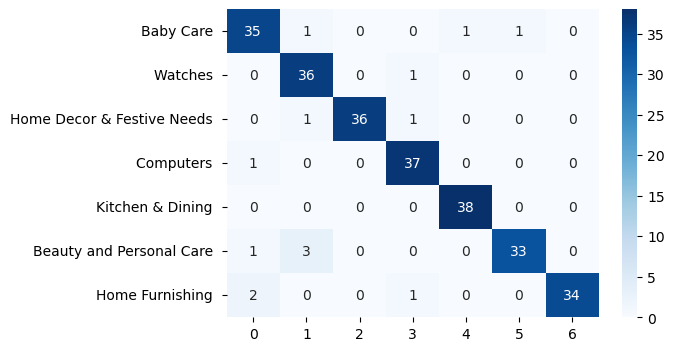

In [65]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in set(df["product_category"])],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

### le ResNet50

In [66]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [67]:
# Création du modèle
with tf.device('/gpu:0'): 
    model3 = create_model_fct()

# Création du callback
model3_save_path = "./model3_best_weights.h5"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [68]:
# entrainement du modele
with tf.device('/gpu:0'): 
    history3 = model3.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.9498 - accuracy: 0.5457

/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_loss improved from inf to 0.60505, saving model to ./model3_best_weights.h5
25/25 [==============================] - 22s 840ms/step - loss: 1.9498 - accuracy: 0.5457 - val_loss: 0.6050 - val_accuracy: 0.7977
Epoch 2/50


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.7779
Epoch 2: val_loss improved from 0.60505 to 0.59565, saving model to ./model3_best_weights.h5
25/25 [==============================] - 21s 828ms/step - loss: 0.7035 - accuracy: 0.7779 - val_loss: 0.5957 - val_accuracy: 0.8168
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.6159 - accuracy: 0.8020
Epoch 3: val_loss did not improve from 0.59565
25/25 [==============================] - 21s 819ms/step - loss: 0.6159 - accuracy: 0.8020 - val_loss: 0.6539 - val_accuracy: 0.8092
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.4941 - accuracy: 0.8452
Epoch 4: val_loss improved from 0.59565 to 0.56378, saving model to ./model3_best_weights.h5
25/25 [==============================] - 20s 803ms/step - loss: 0.4941 - accuracy: 0.8452 - val_loss: 0.5638 - val_accuracy: 0.8206
Epoch 5/50
25/25 [==============================] - ETA: 0s - loss: 0.4111 - accuracy: 0.8642
Epoch 

visualisation graphique ResNet50

In [69]:
# Score du dernier epoch ResNet50

loss, accuracy = model3.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

25/25 [==============================] - 15s 562ms/step - loss: 0.0953 - accuracy: 0.9683
Training Accuracy   : 0.9683

9/9 [==============================] - 6s 570ms/step - loss: 0.7255 - accuracy: 0.7939
Validation Accuracy :  0.7939


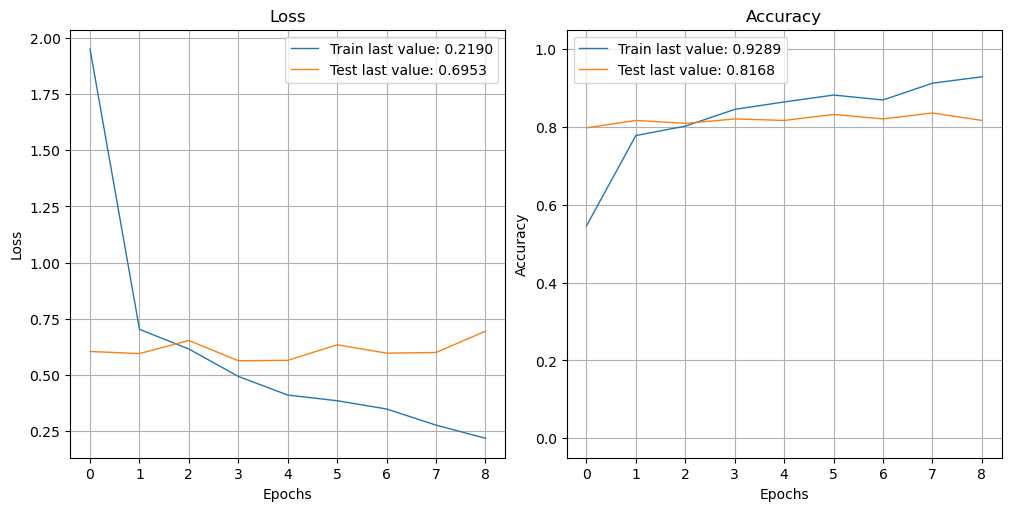

In [70]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history3)
plot_history(history3, path="standard.png")
plt.close()

matrice de confusion

In [71]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model3.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

9/9 [==============================] - 5s 476ms/step
[3 3 1 4 3 1 5 0 3 0 0 4 6 5 0 6 5 0 2 6 2 2 1 0 4 5 4 6 2 2 0 2 1 3 2 0 4
 0 0 1 6 6 1 1 4 4 0 6 2 3 1 2 3 6 1 4 6 1 4 0 1 6 5 1 0 6 5 3 6 0 3 4 0 0
 4 2 4 4 6 3 1 4 5 5 1 2 1 0 3 5 5 2 3 1 6 3 6 5 5 1 5 4 2 4 0 0 0 6 4 6 5
 0 4 5 5 6 1 4 2 1 4 0 3 3 2 3 4 2 0 3 3 0 5 1 3 3 1 5 0 1 0 3 5 2 0 1 5 6
 1 2 6 0 2 1 1 0 3 3 4 3 1 2 5 5 3 5 1 2 4 3 1 2 5 5 2 2 0 0 3 6 0 4 4 1 4
 4 1 3 6 3 6 5 2 5 0 2 2 1 6 2 0 6 4 3 3 5 3 4 1 4 0 5 5 5 2 5 6 3 6 4 6 2
 5 4 1 4 6 6 4 1 3 6 5 6 3 6 3 2 3 2 5 6 0 2 4 5 0 4 3 0 2 4 4 2 2 5 2 6 1
 6 6 2 1]

[2 2 3 5 2 3 4 0 2 0 0 5 1 4 5 1 4 0 6 1 6 6 3 0 5 4 5 1 6 6 0 6 3 2 6 0 5
 0 0 3 1 1 3 3 5 5 0 1 6 2 3 6 2 1 3 5 1 3 5 0 2 1 3 2 0 1 4 2 1 0 2 5 0 0
 5 6 5 5 1 2 3 5 2 4 4 6 3 0 2 4 4 6 2 3 2 2 1 4 4 3 4 5 6 5 0 0 0 1 5 1 4
 0 5 4 4 1 3 5 6 2 5 0 2 2 6 2 5 6 1 2 2 0 4 3 2 2 3 4 3 0 0 2 4 6 0 3 4 1
 3 6 0 0 6 3 3 0 2 2 5 2 3 6 4 3 2 4 3 6 5 2 3 6 4 4 6 6 0 0 2 0 0 5 5 3 5
 5 3 2 2 2 1 4 6 4 0 6 6 3 1 6 0 2 5

In [72]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[35  1  0  1  0  1  0]
 [ 1  0  3 32  1  0  0]
 [ 0  0  0  0  0  0 38]
 [ 0  0 38  0  0  0  0]
 [ 0  0  1  0  0 37  0]
 [ 1  1  1  2 32  0  0]
 [ 2 32  3  0  0  0  0]]


In [73]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 6 3 1 5 4 2]
[[35  1  0  0  1  0  1]
 [ 1 32  0  3  0  1  0]
 [ 0  0 38  0  0  0  0]
 [ 0  0  0 38  0  0  0]
 [ 0  0  0  1 37  0  0]
 [ 1  2  0  1  0 32  1]
 [ 2  0  0  3  0  0 32]]

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.91      0.86      0.89        37
           2       1.00      1.00      1.00        38
           3       0.83      1.00      0.90        38
           4       0.97      0.97      0.97        38
           5       0.97      0.86      0.91        37
           6       0.94      0.86      0.90        37

    accuracy                           0.93       263
   macro avg       0.93      0.93      0.93       263
weighted avg       0.93      0.93      0.93       263



<Axes: >

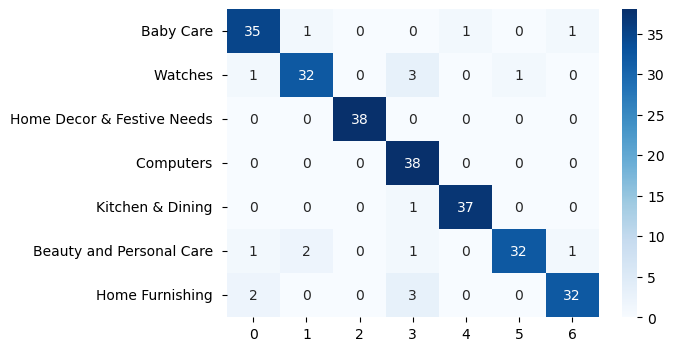

In [74]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in set(df["product_category"])],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")